#Importing modules which we will/might use in the project and loading datasets:

In [ ]:
import numpy as np 
import pandas as pd 
import os
import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from scipy import stats
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, f1_score
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestRegressor
import warnings

warnings.filterwarnings("ignore")

In [ ]:
rain = pd.read_csv('weatherAUS.csv.zip')
rain.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [ ]:
rain.shape

(145460, 23)

In [ ]:
rain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [ ]:
categorical_col, numerical_val=[],[]

for i in rain.columns:
    
    if rain[i].dtype == 'object':
        categorical_col.append(i)
    else:
        numerical_val.append(i)
        
print(categorical_col)
print(numerical_val)

['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']
['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']


In [ ]:
rain.isnull().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

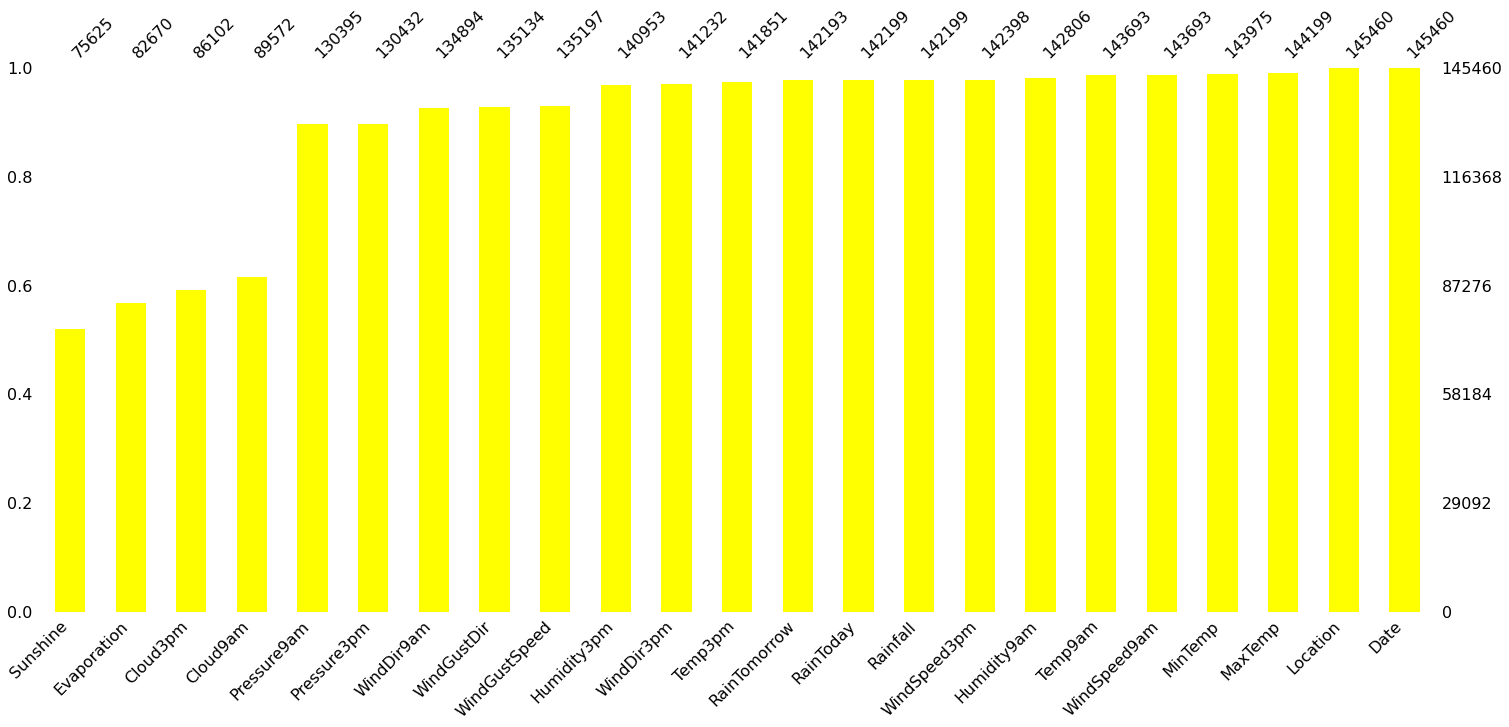

In [ ]:
msno.bar(rain, sort='ascending',color='yellow')

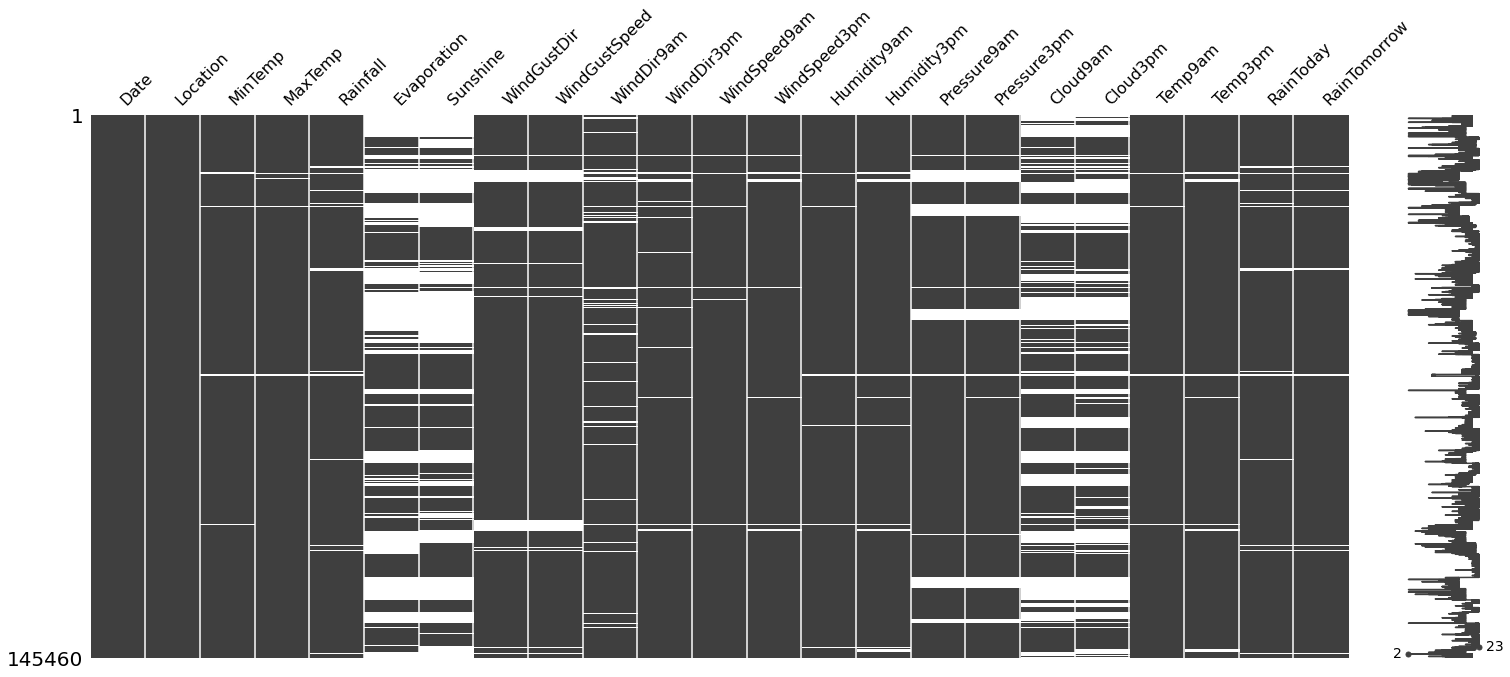

In [ ]:
msno.matrix(rain)

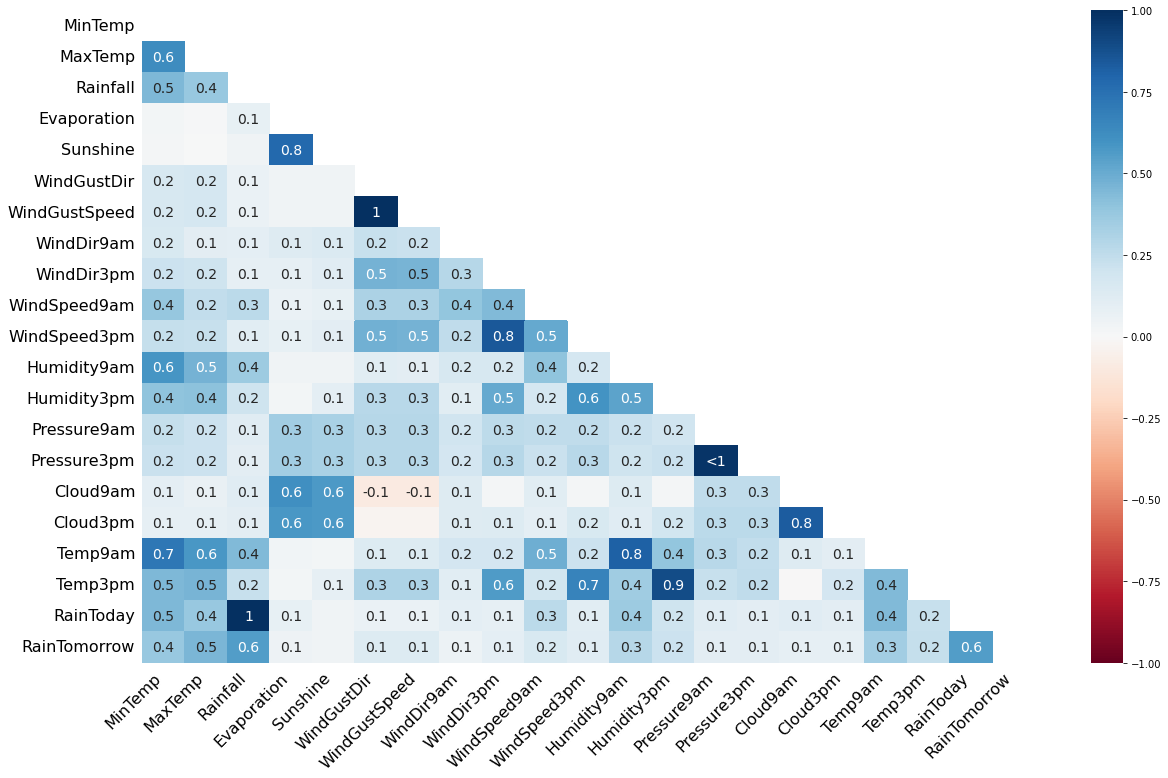

In [ ]:
msno.heatmap(rain)

#From the above plot we can see that the number of missing values are high in : 'Sunshine','Evaporation',' Cloud3pm' and 'Cloud9am'.

In [ ]:
rain['RainTomorrow'] = rain['RainTomorrow'].map({'Yes': 1, 'No': 0})
rain['RainToday'] = rain['RainToday'].map({'Yes': 1, 'No': 0})

print(rain.RainToday)
print(rain.RainTomorrow)

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
145455    0.0
145456    0.0
145457    0.0
145458    0.0
145459    0.0
Name: RainToday, Length: 145460, dtype: float64
0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
145455    0.0
145456    0.0
145457    0.0
145458    0.0
145459    NaN
Name: RainTomorrow, Length: 145460, dtype: float64


In [ ]:
#Filling the missing values for continuous variables with mean
rain['MinTemp']=rain['MinTemp'].fillna(rain['MinTemp'].mean())
rain['MaxTemp']=rain['MinTemp'].fillna(rain['MaxTemp'].mean())
rain['Rainfall']=rain['Rainfall'].fillna(rain['Rainfall'].mean())
rain['Evaporation']=rain['Evaporation'].fillna(rain['Evaporation'].mean())
rain['Sunshine']=rain['Sunshine'].fillna(rain['Sunshine'].mean())
rain['WindGustSpeed']=rain['WindGustSpeed'].fillna(rain['WindGustSpeed'].mean())
rain['WindSpeed9am']=rain['WindSpeed9am'].fillna(rain['WindSpeed9am'].mean())
rain['WindSpeed3pm']=rain['WindSpeed3pm'].fillna(rain['WindSpeed3pm'].mean())
rain['Humidity9am']=rain['Humidity9am'].fillna(rain['Humidity9am'].mean())
rain['Humidity3pm']=rain['Humidity3pm'].fillna(rain['Humidity3pm'].mean())
rain['Pressure9am']=rain['Pressure9am'].fillna(rain['Pressure9am'].mean())
rain['Pressure3pm']=rain['Pressure3pm'].fillna(rain['Pressure3pm'].mean())
rain['Cloud9am']=rain['Cloud9am'].fillna(rain['Cloud9am'].mean())
rain['Cloud3pm']=rain['Cloud3pm'].fillna(rain['Cloud3pm'].mean())
rain['Temp9am']=rain['Temp9am'].fillna(rain['Temp9am'].mean())
rain['Temp3pm']=rain['Temp3pm'].fillna(rain['Temp3pm'].mean())

In [ ]:
#Filling the missing values for continuous variables with mode

rain['RainToday']=rain['RainToday'].fillna(rain['RainToday'].mode()[0])
rain['RainTomorrow']=rain['RainTomorrow'].fillna(rain['RainTomorrow'].mode()[0])

In [ ]:
#Filling the missing values for continuous variables with mode
rain['WindDir9am'] = rain['WindDir9am'].fillna(rain['WindDir9am'].mode()[0])
rain['WindGustDir'] = rain['WindGustDir'].fillna(rain['WindGustDir'].mode()[0])
rain['WindDir3pm'] = rain['WindDir3pm'].fillna(rain['WindDir3pm'].mode()[0])

In [ ]:
#Checking percentage of missing data in every column

(rain.isnull().sum()/len(rain))*100

Date             0.0
Location         0.0
MinTemp          0.0
MaxTemp          0.0
Rainfall         0.0
Evaporation      0.0
Sunshine         0.0
WindGustDir      0.0
WindGustSpeed    0.0
WindDir9am       0.0
WindDir3pm       0.0
WindSpeed9am     0.0
WindSpeed3pm     0.0
Humidity9am      0.0
Humidity3pm      0.0
Pressure9am      0.0
Pressure3pm      0.0
Cloud9am         0.0
Cloud3pm         0.0
Temp9am          0.0
Temp3pm          0.0
RainToday        0.0
RainTomorrow     0.0
dtype: float64

In [ ]:
print(rain.RainToday.value_counts())
print(rain.RainTomorrow.value_counts())

0.0    113580
1.0     31880
Name: RainToday, dtype: int64
0.0    113583
1.0     31877
Name: RainTomorrow, dtype: int64


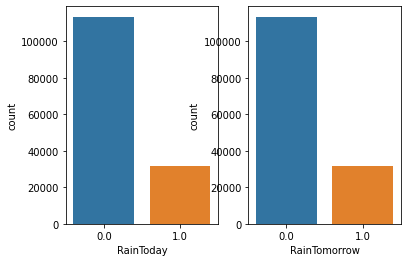

<Figure size 1440x1440 with 0 Axes>

In [ ]:
fig, ax =plt.subplots(1,2)
plt.figure(figsize=(20,20))
sns.countplot(data=rain,x='RainToday',ax=ax[0])
sns.countplot(data=rain,x='RainTomorrow',ax=ax[1])

In [ ]:
#Dropping date column
rain=rain.iloc[:,1:]
rain

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,Albury,13.4,13.4,0.6,5.468232,7.611178,W,44.00000,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.000000,4.50993,16.9,21.8,0.0,0.0
1,Albury,7.4,7.4,0.0,5.468232,7.611178,WNW,44.00000,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,4.447461,4.50993,17.2,24.3,0.0,0.0
2,Albury,12.9,12.9,0.0,5.468232,7.611178,WSW,46.00000,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,4.447461,2.00000,21.0,23.2,0.0,0.0
3,Albury,9.2,9.2,0.0,5.468232,7.611178,NE,24.00000,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,4.447461,4.50993,18.1,26.5,0.0,0.0
4,Albury,17.5,17.5,1.0,5.468232,7.611178,W,41.00000,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.000000,8.00000,17.8,29.7,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,Uluru,2.8,2.8,0.0,5.468232,7.611178,E,31.00000,SE,ENE,13.0,11.0,51.0,24.0,1024.6,1020.3,4.447461,4.50993,10.1,22.4,0.0,0.0
145456,Uluru,3.6,3.6,0.0,5.468232,7.611178,NNW,22.00000,SE,N,13.0,9.0,56.0,21.0,1023.5,1019.1,4.447461,4.50993,10.9,24.5,0.0,0.0
145457,Uluru,5.4,5.4,0.0,5.468232,7.611178,N,37.00000,SE,WNW,9.0,9.0,53.0,24.0,1021.0,1016.8,4.447461,4.50993,12.5,26.1,0.0,0.0
145458,Uluru,7.8,7.8,0.0,5.468232,7.611178,SE,28.00000,SSE,N,13.0,7.0,51.0,24.0,1019.4,1016.5,3.000000,2.00000,15.1,26.0,0.0,0.0


In [ ]:
le = preprocessing.LabelEncoder()
rain['Location'] = le.fit_transform(rain['Location'])
rain['WindDir9am'] = le.fit_transform(rain['WindDir9am'])
rain['WindDir3pm'] = le.fit_transform(rain['WindDir3pm'])
rain['WindGustDir'] = le.fit_transform(rain['WindGustDir'])

In [ ]:
rain.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2,13.4,13.4,0.6,5.468232,7.611178,13,44.0,13,14,20.0,24.0,71.0,22.0,1007.7,1007.1,8.000000,4.50993,16.9,21.8,0.0,0.0
1,2,7.4,7.4,0.0,5.468232,7.611178,14,44.0,6,15,4.0,22.0,44.0,25.0,1010.6,1007.8,4.447461,4.50993,17.2,24.3,0.0,0.0
2,2,12.9,12.9,0.0,5.468232,7.611178,15,46.0,13,15,19.0,26.0,38.0,30.0,1007.6,1008.7,4.447461,2.00000,21.0,23.2,0.0,0.0
3,2,9.2,9.2,0.0,5.468232,7.611178,4,24.0,9,0,11.0,9.0,45.0,16.0,1017.6,1012.8,4.447461,4.50993,18.1,26.5,0.0,0.0
4,2,17.5,17.5,1.0,5.468232,7.611178,13,41.0,1,7,7.0,20.0,82.0,33.0,1010.8,1006.0,7.000000,8.00000,17.8,29.7,0.0,0.0


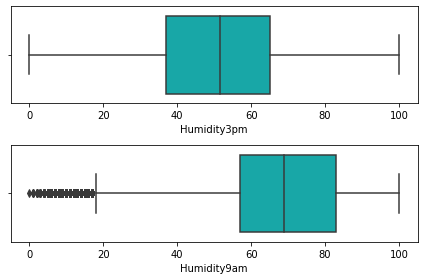

<Figure size 720x720 with 0 Axes>

In [ ]:
fig, ax =plt.subplots(2,1)
plt.figure(figsize=(10,10))
sns.boxplot(rain['Humidity3pm'],orient='v',color='c',ax=ax[0])
sns.boxplot(rain['Humidity9am'],orient='v',color='c',ax=ax[1])
fig.tight_layout()

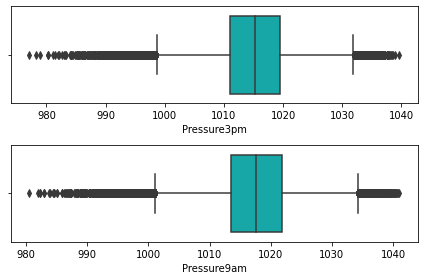

<Figure size 720x720 with 0 Axes>

In [ ]:
fig, ax =plt.subplots(2,1)
plt.figure(figsize=(10,10))
sns.boxplot(rain['Pressure3pm'],orient='v',color='c',ax=ax[0])
sns.boxplot(rain['Pressure9am'],orient='v',color='c',ax=ax[1])
fig.tight_layout()

In [ ]:
print('Shape of DataFrame Before Removing Outliers', rain.shape )
rain=rain[(np.abs(stats.zscore(rain)) < 3).all(axis=1)]
print('Shape of DataFrame After Removing Outliers', rain.shape )

Shape of DataFrame Before Removing Outliers (145460, 22)
Shape of DataFrame After Removing Outliers (136653, 22)


In [ ]:
#Dropping highly correlated columns

rain=rain.drop(['Temp3pm','Temp9am','Humidity9am'],axis=1)
rain.columns

Index(['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity3pm', 'Pressure9am',
       'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(rain.iloc[:,:-2], rain.iloc[:,-2:], test_size=0.2, random_state=42)

In [ ]:
model_rf = RandomForestRegressor(n_estimators = 100, random_state = 0)  
model_rf.fit(x_train, y_train)  
predicted = model_rf.predict(x_test)
print("The accuracy of Random Forest is : ", accuracy_score(y_test, predicted.round())*100, "%")



The accuracy of Random Forest is :  85.39021623797154 %


In [ ]:
import pickle

In [ ]:
pickle.dump(model_rf,open('rainfall_model.pkl','wb'))

In [ ]:
model=pickle.load(open('rainfall_model.pkl','rb'))

In [ ]:
print(model.predict([[2	,13.4,13.4, 0.6,5.468232,7.611178, 13,44.0,13,14,20.0,24.0,22.0,1007.7,1007.1,8.000000,4.50993]]))

[[0.   0.19]]


In [ ]:
print(model.predict([[2	,17.5,	17.5,	1.0,	5.468232	,7.611178	,13,	41.0,	1,	7,	7.0,	20.0	,	33.0,	1010.8,	1006.0,	7.000000	,8.00000]]))	

[[0.   0.44]]


In [ ]:
print(predicted)

[[1.   0.87]
 [0.   0.  ]
 [0.   0.01]
 ...
 [0.   0.01]
 [0.   0.09]
 [1.   0.3 ]]


In [ ]:
predicted.shape

(27331, 2)